In [110]:
## Importing numpy and pandas for data handling
## Importing matplotlib for plotting graphs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Preparing Data
First I import the data using Pandas. I had some issues importing using numpy as some of the columns had text as input. Next I only includes the rows that has either 'cp' or 'im' in the eight column. Then I drop the first column, as it only contain text and is not useful for the testing. 



In [126]:
dataset_unfiltered = pd.read_csv("../../Datasets/ecoli.data", sep='\\s+', header=None)
dataset_filtered = dataset_unfiltered[dataset_unfiltered.iloc[:, 8].isin(['cp', 'im'])]
dataset_filtered = dataset_filtered.drop(dataset_filtered.columns[0], axis=1)
dataset_filtered.iloc[:, 7] = dataset_filtered.iloc[:, 7].replace(['im', 'cp'], ['1', '0'])
dataset_filtered = dataset_filtered.astype(float)
dataset = dataset_filtered.values

## Increasing the dataset and shuffeling.
np.random.seed(7)
np.random.shuffle(dataset)

# Training data and testing data
split_ratio = 0.8
split_index = int(len(dataset) * split_ratio)
train_data = dataset[:split_index, :]
test_data = dataset[split_index:, :]

#train_data = np.concatenate([train_data] * 100)
#np.random.shuffle(train_data)

print(len(train_data))
print(len(test_data))

176
44


## Architecture
My initial thoughts can be seen in this image: https://postimg.cc/FkzYbXkq

The weight names do not represent how it is structured in this file.

In [127]:
weights = np.random.uniform(-1, 1, 14)
print(weights)

def sigmoid(z):
    if(z<-100):
        return 0
    if(z>100):
        return 1
    return 1.0/(1+math.exp(-z))

def sigmoid_derivative(z):
    return z * (1.0 - z)

def firstLayer(row, weights):
    activation_1 = weights[0]
    activation_1 += weights[1]*row[0]
    activation_1 += weights[2]*row[1]

    activation_2 = weights[3]
    activation_2 += weights[4]*row[2]
    activation_2 += weights[5]*row[3]

    activation_3 = weights[6]
    activation_3 += weights[7]*row[4]
    activation_3 += weights[8]*row[5]
    activation_3 += weights[9]*row[6]

    return sigmoid(activation_1), sigmoid(activation_2), sigmoid(activation_3)

def secondLayer(row, weights):
    activation_4 = weights[10]
    activation_4 += weights[11]*row[0]
    activation_4 += weights[12]*row[1]
    activation_4 += weights[13]*row[2]
    return sigmoid(activation_4)

def predict(row, weights):
    input_layer = row
    first_layer = firstLayer(input_layer, weights)
    second_layer = secondLayer(first_layer, weights)
    return second_layer, first_layer


[ 0.3933918  -0.14589301 -0.73085908 -0.33728558  0.18069171  0.88132279
  0.98511544 -0.51679417 -0.97884019  0.66128065  0.85322588 -0.08279304
  0.54288469  0.73239807]


In [128]:
train_loss = []
train_acc = []

def train_weights(train, learningrate, epochs):
    
    for epoch in range(epochs):
        sum_error = 0.0
        correct_train = 0

        # training phase
        for row in train_data:
            prediction, first_layer = predict(row, weights)
            error = row[-1]-prediction
            sum_error += error**2 # Making error squared to get positive values

            # Backpropagation
            output_delta = error * sigmoid_derivative(prediction)

            # Backpropogation for the second layer
            weights[10] += learningrate * output_delta
            weights[11] += learningrate * output_delta * first_layer[0]
            weights[12] += learningrate * output_delta * first_layer[1]
            weights[13] += learningrate * output_delta * first_layer[2]

             # Backpropagation for first layer
            first_layer_error = [output_delta * weights[11], output_delta * weights[12], output_delta * weights[13]]
            
            first_layer_delta = [
                first_layer_error[0] * first_layer[0] * (1.0 - first_layer[0]),
                first_layer_error[1] * first_layer[1] * (1.0 - first_layer[1]),
                first_layer_error[2] * first_layer[2] * (1.0 - first_layer[2])
            ]


            # First layer
            weights[0] += learningrate*first_layer_delta[0]
            weights[1] += learningrate*first_layer_delta[0]*row[0]
            weights[2] += learningrate*first_layer_delta[0]*row[1]
            
            weights[3] += learningrate*first_layer_delta[1]
            weights[4] += learningrate*first_layer_delta[1]*row[2]
            weights[5] += learningrate*first_layer_delta[1]*row[3]

            weights[6] += learningrate*first_layer_delta[2]
            weights[7] += learningrate*first_layer_delta[2]*row[4]
            weights[8] += learningrate*first_layer_delta[2]*row[5]
            weights[9] += learningrate*first_layer_delta[2]*row[6]

            predicted_class = int(round(prediction))
            actual_class = int(row[-1])

            if predicted_class == actual_class:
                correct_train += 1

        mse_train = sum_error / len(train_data)
        train_loss.append(mse_train)

        acc_train = correct_train/len(train_data)
        train_acc.append(acc_train)

        if(epoch%50 == 0):
            print(f"Epoch {epoch}, Accuracy: {acc_train:.4f}, MSE Loss: {mse_train:.4f}")
    return weights

## Evaluating data
Using the updated weights for the test data to validate the model

In [129]:
def evaluate_data(test_data, weights):
    sum_error = 0.0
    correct_test = 0

    for row in test_data:
        prediction, _ = predict(row[:-1], weights)
        error = row[-1] - prediction
        sum_error += error**2

        predicted_class = int(round(prediction))
        actual_class = int(row[-1])

        if predicted_class == actual_class:
            correct_test += 1

    mse_test = sum_error / len(test_data)
    acc_test = correct_test / len(test_data)
    return mse_test, acc_test

## Initializing the model
Learning rate and number of epochs is set, and the weights are trained. Then the data is evaluated.

In [130]:
learningrate = 0.01
epochs = 300

train_weights = train_weights(train_data,learningrate,epochs)
test_loss, test_acc = evaluate_data(test_data, weights)

print(f"TEST DATA: Accuracy: {test_acc:.4f}, MSE Loss: {test_loss:.4f}")


# Printing final weights
count = 0
for i in weights:
    count+=1;
    print('Weight', count , ': ', i)

Epoch 0, Accuracy: 0.3523, MSE Loss: 0.4419
Epoch 50, Accuracy: 0.6477, MSE Loss: 0.2251
Epoch 100, Accuracy: 0.6477, MSE Loss: 0.2203
Epoch 150, Accuracy: 0.6477, MSE Loss: 0.2073
Epoch 200, Accuracy: 0.6477, MSE Loss: 0.1826
Epoch 250, Accuracy: 0.8295, MSE Loss: 0.1471
TEST DATA: Accuracy: 0.9545, MSE Loss: 0.1111
Weight 1 :  0.32201286981880944
Weight 2 :  -0.7963152499669857
Weight 3 :  -1.2147720260057786
Weight 4 :  -0.3032379012467229
Weight 5 :  0.20811266619706648
Weight 6 :  0.8983466252069999
Weight 7 :  1.931548030901348
Weight 8 :  -0.48704979606818427
Weight 9 :  -3.214604551004868
Weight 10 :  -0.7439447515864707
Weight 11 :  1.0489396259620596
Weight 12 :  -0.9496760969600999
Weight 13 :  0.6610208688831121
Weight 14 :  -3.594355947617329


## Plotting data

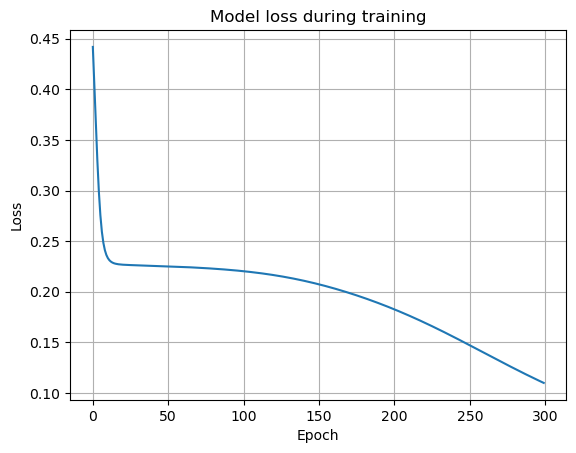

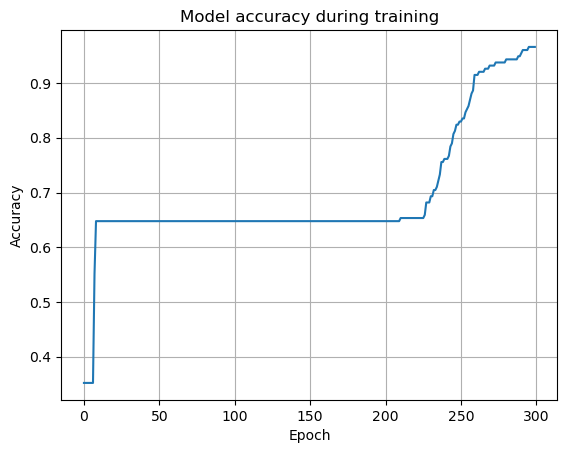

In [92]:
plt.plot(train_loss)
plt.grid(True)
plt.title('Model loss during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(train_acc)
plt.grid(True)
plt.title('Model accuracy during training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
